[5.1 3.5 1.4 0.2] 0
[4.9 3.  1.4 0.2] 0
[4.7 3.2 1.3 0.2] 0
[4.6 3.1 1.5 0.2] 0
[5.  3.6 1.4 0.2] 0
[5.4 3.9 1.7 0.4] 0
[4.6 3.4 1.4 0.3] 0
[5.  3.4 1.5 0.2] 0
[4.4 2.9 1.4 0.2] 0
[4.9 3.1 1.5 0.1] 0
[5.4 3.7 1.5 0.2] 0
[4.8 3.4 1.6 0.2] 0
[4.8 3.  1.4 0.1] 0
[4.3 3.  1.1 0.1] 0
[5.8 4.  1.2 0.2] 0
[5.7 4.4 1.5 0.4] 0
[5.4 3.9 1.3 0.4] 0
[5.1 3.5 1.4 0.3] 0
[5.7 3.8 1.7 0.3] 0
[5.1 3.8 1.5 0.3] 0
[5.4 3.4 1.7 0.2] 0
[5.1 3.7 1.5 0.4] 0
[4.6 3.6 1.  0.2] 0
[5.1 3.3 1.7 0.5] 0
[4.8 3.4 1.9 0.2] 0
[5.  3.  1.6 0.2] 0
[5.  3.4 1.6 0.4] 0
[5.2 3.5 1.5 0.2] 0
[5.2 3.4 1.4 0.2] 0
[4.7 3.2 1.6 0.2] 0
[4.8 3.1 1.6 0.2] 0
[5.4 3.4 1.5 0.4] 0
[5.2 4.1 1.5 0.1] 0
[5.5 4.2 1.4 0.2] 0
[4.9 3.1 1.5 0.2] 0
[5.  3.2 1.2 0.2] 0
[5.5 3.5 1.3 0.2] 0
[4.9 3.6 1.4 0.1] 0
[4.4 3.  1.3 0.2] 0
[5.1 3.4 1.5 0.2] 0
[5.  3.5 1.3 0.3] 0
[4.5 2.3 1.3 0.3] 0
[4.4 3.2 1.3 0.2] 0
[5.  3.5 1.6 0.6] 0
[5.1 3.8 1.9 0.4] 0
[4.8 3.  1.4 0.3] 0
[5.1 3.8 1.6 0.2] 0
[4.6 3.2 1.4 0.2] 0
[5.3 3.7 1.5 0.2] 0
[5.  3.3 1.4 0.2] 0


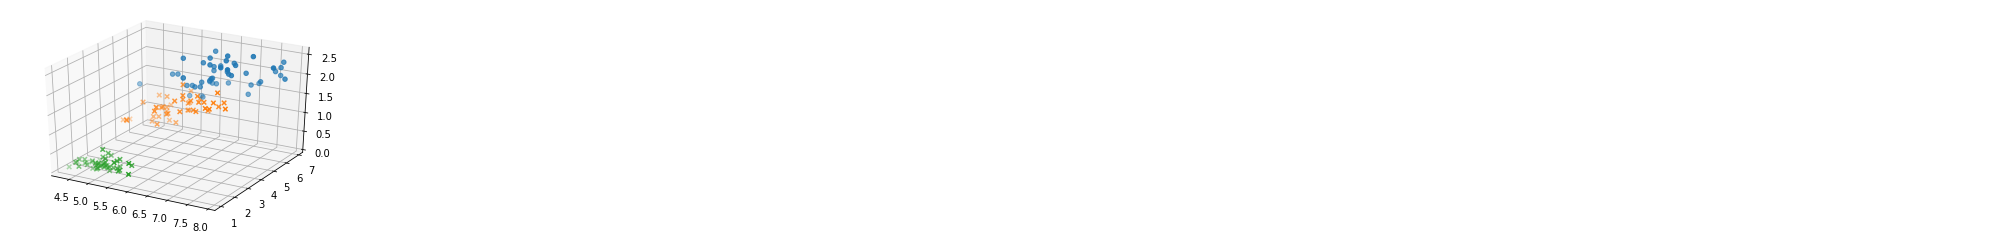

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

iris =datasets.load_iris()

setosa=iris.data[0:50]
versicolor=iris.data[50:100]
virginica=iris.data[100:150]

setosa_sepal_length_avg=np.mean(setosa[:,0])
setosa_sepal_width_avg=np.mean(setosa[:,1])
setosa_petal_length_avg=np.mean(setosa[:,2])
setosa_petal_width_avg=np.mean(setosa[:,3])

versicolor_sepal_length_avg=np.mean(versicolor[:,0])
versicolor_sepal_width_avg=np.mean(versicolor[:,1])
versicolor_petal_length_avg=np.mean(versicolor[:,2])
versicolor_petal_width_avg=np.mean(versicolor[:,3])

virginica_sepal_length_avg=np.mean(virginica[:,0])
virginica_sepal_width_avg=np.mean(virginica[:,1])
virginica_petal_length_avg=np.mean(virginica[:,2])
virginica_petal_width_avg=np.mean(virginica[:,3])

#eğer veriler sınıflara ayrılmışsa elimizdeki veri setinde sınıf sayısını bulabiliriz.
def sinifsayisibul():
    h=[]
    for i in range(len(iris.target)):
        if (iris.target[i] in h):
            continue
        else:
            h.append(iris.target[i])
    return len(h)
    
sinifsayisibul()


def sinifdondur(sinif):
    if(sinifsayisibul()<sinif):
        print("Böyle bir sınıf yok")
    else:
        data = iris.data
        classId = iris.target[:]
        number_of_class = 3
        class_counter = 1
        for j in range(number_of_class):
            for i in range(len(classId)):
                if(classId[i] == sinif):
                    print(data[i],classId[i])
        print("-"*50)
        class_counter+=1
        
sinifdondur(0) #0. sınıfın verileri gelir kaç tane sınıf olduğunuda sinifsayisibul() fonk'nu kullanılarak bulunabilir

print("*"*100)


%matplotlib inline

fig=plt.figure()
ax=plt.axes(projection='3d')

xdata=iris.data[:,0]
ydata=iris.data[:,2]
zdata=iris.data[:,3]
label=iris.target

ax.scatter3D(xdata[100:149], ydata[100:149], zdata[100:149],marker='o')
ax.scatter3D(xdata[50:99], ydata[50:99], zdata[50:99],marker='x')
ax.scatter3D(xdata[0:49], ydata[0:49], zdata[0:49],marker='x')


def get_mu_s():
    mu_0=[5,2,0]
    mu_1=[4,4,0]
    mu_2=[3,2,5]
    
    return mu_0,mu_1,mu_2

def get_distance(mu,point):
    x=mu[0]-point[0]
    y=mu[1]-point[1]
    z=mu[2]-point[2]
    return (x**2+y**2+z**2)**0.5


def get_class_for_one_instance(flower):
    mu_s = get_mu_s()
    d_0 = get_distance(mu_s[0], flower)
    d_1 = get_distance(mu_s[1], flower)
    d_2 = get_distance(mu_s[2], flower)
    
    if((d_0 < d_1) and (d_0 < d_2)):
        return "0"
    if((d_1 < d_0) and (d_1 < d_2)):
        return "1"
    if((d_2 < d_1) and (d_2 < d_0)):
        return "2"
    

def my_f_1(s_1=125):
    x=iris.data[s_1][0]
    y=iris.data[s_1][2]
    z=iris.data[s_1][3]
    my_f_1=[x,y,z]
    r=get_class_for_one_instance(my_f_1)
    print(r)
    
for i in range(150):
    my_f_1(i)

    
def get_flower(i): 
    #iris data üzerinde bana i değerinde gelen datanın 0 2 3 sütunun donduruyorum
    x=iris.data[i][0]
    y=iris.data[i][2]
    z=iris.data[i][3]
    return [x,y,z]
    
    
def update_mu(): 
    #150 ya kadar her bir çicek için bana class bilgisi ver güncelle ve geriye mu'leri ver
    hata="yok"
    mu_0_counter=0.0001
    mu_0_sum=0
    
    mu_1_counter=0.0001
    mu_1_sum=0
    
    mu_2_counter=0.0001
    mu_2_sum=0
    
    c_1=[]
    c_2=[]
    c_3=[]
    
    for i in range(150):
        my_flower_data=get_flower(i)
        f_class = get_class_for_one_instance(my_flower_data)
        hata="var"
        if(f_class=="0"):
            c_1.append(my_flower_data)
        if(f_class=="1"):
            c_2.append(my_flower_data)
        if(f_class=="2"):
            c_3.append(my_flower_data)
    return c_1,c_2,c_3
    
    
c_1,c_2,c_3 = update_mu()
print(len(c_1))
print(len(c_2))
print(len(c_3))






    
